In [68]:
from PIL import Image, ImageDraw, ImageFont

In [368]:
avatar = Image.new('RGB', (640,640), color='#555555')
draw = ImageDraw.Draw(avatar)
image_w, image_h = avatar.size

bold = 'resources/Montserrat-Bold.ttf'
semibold = 'resources/Montserrat-SemiBold.ttf'
fontsize = 92
margin = image_w / 10
spacer = image_w / 100

# Write .avax font
font = ImageFont.truetype(semibold, 46)
tld = ".avax"

tld_w, tld_h = draw.textsize(tld, font)
loc_x = image_w - tld_w - margin
loc_y = image_h - tld_h - margin

# Shadow
draw.text((loc_x + 2, loc_y + 2), tld, '#000000', font=font)
draw.text((loc_x, loc_y), tld, '#cccccc', font=font)


In [369]:
domain = "dao"
fontsize = 46
writable_w = image_w - (margin * 2)
lines = []

font = ImageFont.truetype(bold, fontsize)
domain_w, domain_h = draw.textsize(domain, font)

if domain_w < writable_w:
    while domain_w < writable_w and fontsize < 128:
        fontsize = fontsize + 1
        font = ImageFont.truetype(bold, fontsize)
        domain_w, domain_h = draw.textsize(domain, font)
    if domain_w > writable_w:
        fontsize = fontsize - 1
        font = ImageFont.truetype(bold, fontsize)
        domain_w, domain_h = draw.textsize(domain, font)
    else: 
        font = ImageFont.truetype(bold, fontsize)
        domain_w, domain_h = draw.textsize(domain, font)

else:
    domainstring = domain
    remaining = len(domainstring)

    while remaining > 0:

        if remaining <= 10:
            linelength = remaining
            line = domainstring[0:len(domainstring)]
            line_w, line_h = draw.textsize(line, font)
            remaining = 0
        
        else:
            linelength = 10
            line = domainstring[0:linelength]
            line_w, line_h = draw.textsize(line, font)

            while line_w < writable_w and remaining > 0:
                linelength = linelength + 1
                line = domainstring[0:linelength]
                remaining = len(domainstring) - len(line)
                line_w, line_h = draw.textsize(line, font)

        if line_w > writable_w:
            lines.append(domainstring[0:linelength-1])
            domainstring = domainstring[linelength-1:len(domainstring)]
            remaining = remaining + 1
        else: 
            lines.append(domainstring[0:linelength])
            domainstring = domainstring[linelength:len(domainstring)]
        
if lines:
    lineheight = fontsize * 1.1
    numlines = len(lines)
    combined_h = lineheight + spacer + tld_h
    lineref = list(range(len(lines)-1, -1, -1))
    for num in range(0, numlines):
        multiple = num + 1
        line = lines[lineref[num]]
        line_w, line_h = draw.textsize(line, font)
        line_h = lineheight + spacer
        loc_x = image_w - line_w - margin
        loc_y = image_h - (line_h * multiple) - margin - tld_h
        draw.text((loc_x, loc_y), line, '#ffffff', font=font)

else:

    lineheight = fontsize * 1.1
    loc_x = image_w - domain_w - margin
    loc_y = image_h - lineheight - margin - spacer - tld_h

    draw.text((loc_x, loc_y), domain, '#ffffff', font=font)



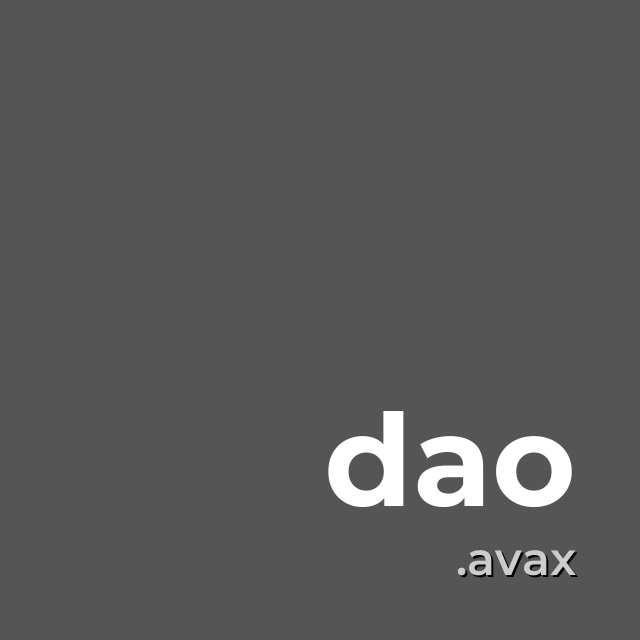

In [370]:
avatar